In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

C:\Users\sjasm\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sjasm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sjasm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


### Transfer Learning using Resnet50

In [2]:
# preprocess the images

Image_size = [224, 224]

train_path = "dataset/Train/"
test_path = "dataset/Test/"

In [3]:
#importing renet50

resnet = ResNet50(input_shape=Image_size + [3], weights= 'imagenet', include_top = False)

In [4]:
#removing training of pretrained weights

for layer in resnet.layers:
    layer.trainable = False

In [5]:
training_classes = glob('dataset/Train/*')

In [6]:
training_classes

['dataset/Train\\audi',
 'dataset/Train\\lamborghini',
 'dataset/Train\\mercedes']

In [7]:
#flatteining the resnet output

x = Flatten()(resnet.output)

In [8]:
x

<KerasTensor: shape=(None, 100352) dtype=float32 (created by layer 'flatten')>

In [9]:
#adding output layer to the model

output_pred = Dense(len(training_classes), activation = 'softmax')(x)

Model = Model(inputs = resnet.input, outputs = output_pred)

In [10]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
# compiling the model

Model.compile(
loss = 'categorical_crossentropy', 
    optimizer = 'adam', 
    metrics = ['accuracy']
)

In [17]:
#generating data uding data augmentation

train_data_gen = ImageDataGenerator(rescale= 1/255, shear_range = 0.2, zoom_range=0.2,
                               horizontal_flip= True)

test_data_gen = ImageDataGenerator(rescale= 1/255)  #no need of data augmentation for test data

In [19]:
#generating aug data using generator

train_data = train_data_gen.flow_from_directory('dataset/Train/', target_size=(224,224),
                                               batch_size = 32, class_mode= 'categorical')

test_data = test_data_gen.flow_from_directory('dataset/Test/', target_size=(224,224),
                                               batch_size = 32, class_mode= 'categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [22]:
#model training

tr = Model.fit_generator(
    train_data,
    validation_data= test_data,
    epochs = 50,
    steps_per_epoch = len(train_data),
    validation_steps= len(test_data)
)


C:\Users\sjasm\anaconda3\lib\site-packages\tensorflow-2.5.0-py3.8-win-amd64.egg\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 27s 3s/step - loss: 5.1885 - accuracy: 0.2812 - val_loss: 5.4733 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 2s 884ms/step - loss: 6.0688 - accuracy: 0.3750 - val_loss: 2.7566 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 2s 917ms/step - loss: 2.4366 - accuracy: 0.3594 - val_loss: 1.9164 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 846ms/step - loss: 1.5512 - accuracy: 0.4219 - val_loss: 1.4678 - val_accuracy: 0.5690
Epoch 5/50
2/2 [==============================] - 1s 850ms/step - loss: 1.2009 - accuracy: 0.5938 - val_loss: 1.6720 - val_accuracy: 0.2069
Epoch 6/50
2/2 [==============================] - 2s 906ms/step - loss: 1.0550 - accuracy: 0.4844 - val_loss: 1.6458 - val_accuracy: 0.3448
Epoch 7/50
2/2 [==============================] - 2s 885ms/step - loss: 0.8072 - accuracy: 0.5781 - val_loss: 1.2095 - val_accuracy: 0.6034
Epoch 8/50
2/2 [======

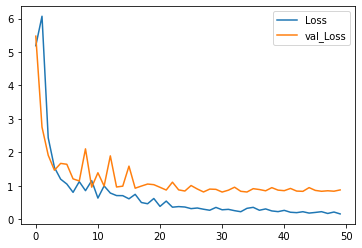

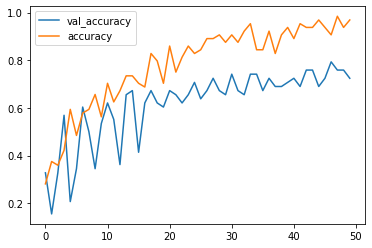

In [28]:
# plotting losses and accuracy

plt.plot(tr.history['loss'], label = 'Loss')
plt.plot(tr.history['val_loss'], label = 'val_Loss')
plt.legend()
plt.show()
plt.plot(tr.history['val_accuracy'], label = 'val_accuracy')
plt.plot(tr.history['accuracy'], label = 'accuracy')
plt.legend()
plt.show()

In [29]:
#save the model

Model.save('model1.h5')

C:\Users\sjasm\anaconda3\lib\site-packages\tensorflow-2.5.0-py3.8-win-amd64.egg\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [30]:
y_pred = Model.predict(test_data)

In [31]:
y_pred

array([[4.65276062e-01, 4.19316083e-01, 1.15407810e-01],
       [3.56597565e-02, 8.19187939e-01, 1.45152315e-01],
       [1.60654467e-02, 3.72759439e-02, 9.46658611e-01],
       [3.84348422e-01, 2.55671650e-01, 3.59979928e-01],
       [5.73461279e-02, 7.55522013e-01, 1.87131792e-01],
       [8.86574864e-01, 1.12838484e-01, 5.86654118e-04],
       [6.96899965e-02, 1.94978520e-01, 7.35331416e-01],
       [2.12172344e-02, 9.45733964e-01, 3.30487601e-02],
       [7.94204593e-01, 1.16476886e-01, 8.93185660e-02],
       [7.76073694e-01, 1.41119435e-01, 8.28068629e-02],
       [1.13995023e-01, 3.36354375e-01, 5.49650609e-01],
       [1.38715014e-01, 7.16229737e-01, 1.45055309e-01],
       [1.27623513e-01, 5.72151244e-01, 3.00225228e-01],
       [7.59310275e-02, 8.08385573e-03, 9.15985107e-01],
       [1.44912556e-01, 7.47362971e-01, 1.07724585e-01],
       [2.51435220e-01, 1.65010337e-02, 7.32063770e-01],
       [4.98540074e-01, 4.83047515e-01, 1.84123982e-02],
       [3.18595469e-01, 5.54258

In [32]:
y_pred = np.argmax(y_pred, axis  = 1)

In [33]:
y_pred

array([0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1], dtype=int64)

In [43]:
## prediction on a asingle image

img = image.load_img('dataset/Test/lamborghini/10.jpg', target_size=(224,224))

In [44]:
img_arr = image.img_to_array(img)
img_arr.shape

(224, 224, 3)

In [45]:
img_arr = img_arr/255

In [46]:
img_arr = np.expand_dims(img_arr, axis = 0)

In [47]:
img_arr.shape

(1, 224, 224, 3)

In [49]:
#preproces the image 
y = Model.predict(img_arr)

In [50]:
y = np.argmax(y, axis = 1)

In [51]:
y

array([1], dtype=int64)

In [ ]:
#creating the flask app for the model prediction